In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./tendulkar_ODI.csv')

In [3]:
df.head()

,Unnamed: 0,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,1,0,-,2,0,0,0,5,caught,2,v Pakistan,Gujranwala,18-Dec-89
1,2,0,2,2,0,0,0,5,caught,2,v New Zealand,Dunedin,1-Mar-90
2,3,36,51,39,5,0,92.3,6,caught,1,v New Zealand,Wellington,6-Mar-90
3,4,19,38,35,1,1,54.28,4,bowled,2,v England,Leeds,18-Jul-90
4,5,31,31,26,3,0,119.23,6,bowled,2,v England,Nottingham,20-Jul-90


In [4]:
df.Runs.value_counts()

1      16
2      14
0      12
4       9
21      8
       ..
120     1
74      1
26*     1
72      1
79      1
Name: Runs, Length: 118, dtype: int64

In [5]:
df.Runs = df.Runs.apply(lambda x : x[0:-1] if x[-1] == '*' else x )

### Find if there are any non-numerical values

In [53]:
df[-df.Runs.str.isnumeric()]

AttributeError: 'DataFrame' object has no attribute 'Runsisnumeric'

In [28]:
df.Runs = df['Runs'].replace(['DNB','TDNB'], np.NaN)

In [78]:
df.Runs.isnull().sum()

0

In [72]:
df.Runs = pd.to_numeric(df.Runs)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  295 non-null    int64  
 1   Runs        295 non-null    float64
 2   Mins        295 non-null    object 
 3   BF          295 non-null    object 
 4   4s          292 non-null    object 
 5   6s          295 non-null    object 
 6   SR          295 non-null    object 
 7   Pos         295 non-null    object 
 8   Dismissal   295 non-null    object 
 9   Inns        295 non-null    object 
 10  Opposition  295 non-null    object 
 11  Ground      295 non-null    object 
 12  Start Date  295 non-null    object 
dtypes: float64(1), int64(1), object(11)
memory usage: 30.1+ KB


In [50]:
df.fillna({'Runs': str(df.Runs.mean())}, inplace= True)

### Analyzing 4s column

* There are no null Values
* There are 3 non-numeric values, and all of them are '-'

In [77]:
df['4s'].isnull().sum()

3

In [58]:
df['4s'].value_counts()

0     69
1     37
2     29
3     25
4     17
5     16
9     15
6     14
7     13
8     13
10    11
13     8
12     5
11     4
15     4
16     4
14     3
-      3
19     2
20     1
25     1
17     1
Name: 4s, dtype: int64

In [60]:
df[-df['4s'].str.isnumeric()]

,Unnamed: 0,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
8,9,39.4486301369863,-,-,-,-,-,-,-,2,v Bangladesh,Chandigarh,25-Dec-90
38,39,39.4486301369863,-,-,-,-,-,-,-,2,v Zimbabwe,Pune,25-Mar-93
233,234,39.4486301369863,-,-,-,-,-,-,-,-,v Sri Lanka,Kolkata,8-Feb-07


In [67]:
df['4s'] = df['4s'].replace('-',np.NaN)

In [74]:
df['4s'] = pd.to_numeric(df['4s'])

In [79]:
df.fillna({'4s': df['4s'].mean()}, inplace= True)

In [81]:
df['4s'].isnull().sum()

0

### Runs Bar Plot

In [84]:
runs_rank_frequency = df.Runs.value_counts()

<BarContainer object of 106 artists>

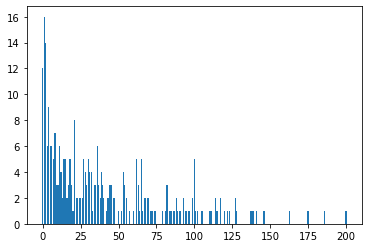

In [89]:
plt.bar(x = runs_rank_frequency.index, height=runs_rank_frequency,)

In [90]:
?plt.bar

<AxesSubplot:ylabel='Frequency'>

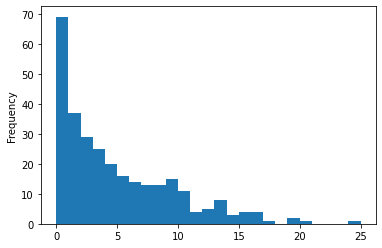

In [92]:
df['4s'].plot.hist(bins=25)

<AxesSubplot:>

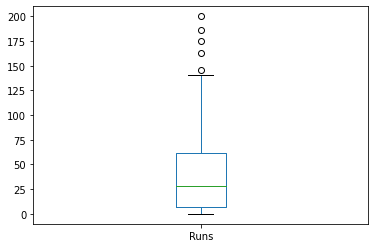

In [93]:
df.Runs.plot.box()